In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
date = {
    '电影名称':['movie1','movie2','movie3','movie4','movie5','movie6'],
    '打斗镜头':[3,2,1,101,99,98],
    '接吻镜头':[104,100,81,10,5,2],
    '电影类型':['爱情','爱情','爱情','战争','战争','战争']
}
df = pd.DataFrame(date)
print(date['打斗镜头'])
df

[3, 2, 1, 101, 99, 98]


,电影名称,打斗镜头,接吻镜头,电影类型
0,movie1,3,104,爱情
1,movie2,2,100,爱情
2,movie3,1,81,爱情
3,movie4,101,10,战争
4,movie5,99,5,战争
5,movie6,98,2,战争


In [3]:
df.iloc[:,0:2]

,电影名称,打斗镜头
0,movie1,3
1,movie2,2
2,movie3,1
3,movie4,101
4,movie5,99
5,movie6,98


<function matplotlib.pyplot.show(close=None, block=None)>

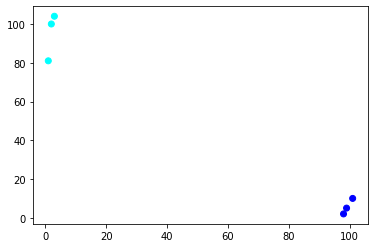

In [4]:
x = np.array(date['打斗镜头'])
y = np.array(date['接吻镜头'])

plt.scatter(x,y,c=['cyan','cyan','cyan','blue','blue','blue'])
plt.show

In [5]:
new_date = [18,90]

df.iloc[:,1:3] - new_date

,打斗镜头,接吻镜头
0,-15,14
1,-16,10
2,-17,-9
3,83,-80
4,81,-85
5,80,-88


In [6]:
(df.iloc[:,1:3] - new_date)**2

,打斗镜头,接吻镜头
0,225,196
1,256,100
2,289,81
3,6889,6400
4,6561,7225
5,6400,7744


In [7]:
dist = ((df.iloc[:,1:3] - new_date)**2).sum(axis=1)**0.5
dist

0     20.518285
1     18.867962
2     19.235384
3    115.277925
4    117.413798
5    118.928550
dtype: float64

In [8]:
dist_f  = pd.DataFrame({
    'dist':dist,
    'label':df.iloc[:,3]
})
dist_f

,dist,label
0,20.518285,爱情
1,18.867962,爱情
2,19.235384,爱情
3,115.277925,战争
4,117.413798,战争
5,118.928550,战争


In [9]:
dist_f.sort_values(by='dist')

,dist,label
1,18.867962,爱情
2,19.235384,爱情
0,20.518285,爱情
3,115.277925,战争
4,117.413798,战争
5,118.928550,战争


In [10]:
k = 5
dist_f.sort_values(by='dist')[:k].value_counts('label')

label
爱情    3
战争    2
dtype: int64

In [11]:
re = dist_f.sort_values(by='dist')[:k].value_counts('label')
re.index[0]

'爱情'

In [25]:
def classify_1(inX,dataSet,k):
    df = pd.DataFrame(dataSet)
    dist = ((df.iloc[:,1:3] - inX)**2).sum(axis=1)**0.5
    dist_f  = pd.DataFrame({
    'dist':dist,
    'label':df.iloc[:,3]
    })
    dist_f.sort_values(by='dist')[:k].value_counts('label')
    re = dist_f.sort_values(by='dist')[:k].value_counts('label')
    print(re.index[0])

new_date = [19,80]
classify_1(new_date,date,5)

爱情
